In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
path=r"D:\Docu\pyjunb\smartbridge\data\T1.csv"
df = pd.read_csv(path)
print(df.head())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


In [5]:
df.rename(columns={'Date/Time': 'Time',
'LV ActivePower (kW)': 'ActivePower(kW)',
"Wind Speed (m/s)": "WindSpeed(m/s)",
"Wind Direction (°)":"Wind_Direction"},
inplace=True)

In [6]:
#df.drop(['Wind_Direction'], axis=1,inplace = True)
df ["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H:%M", errors = "coerce")

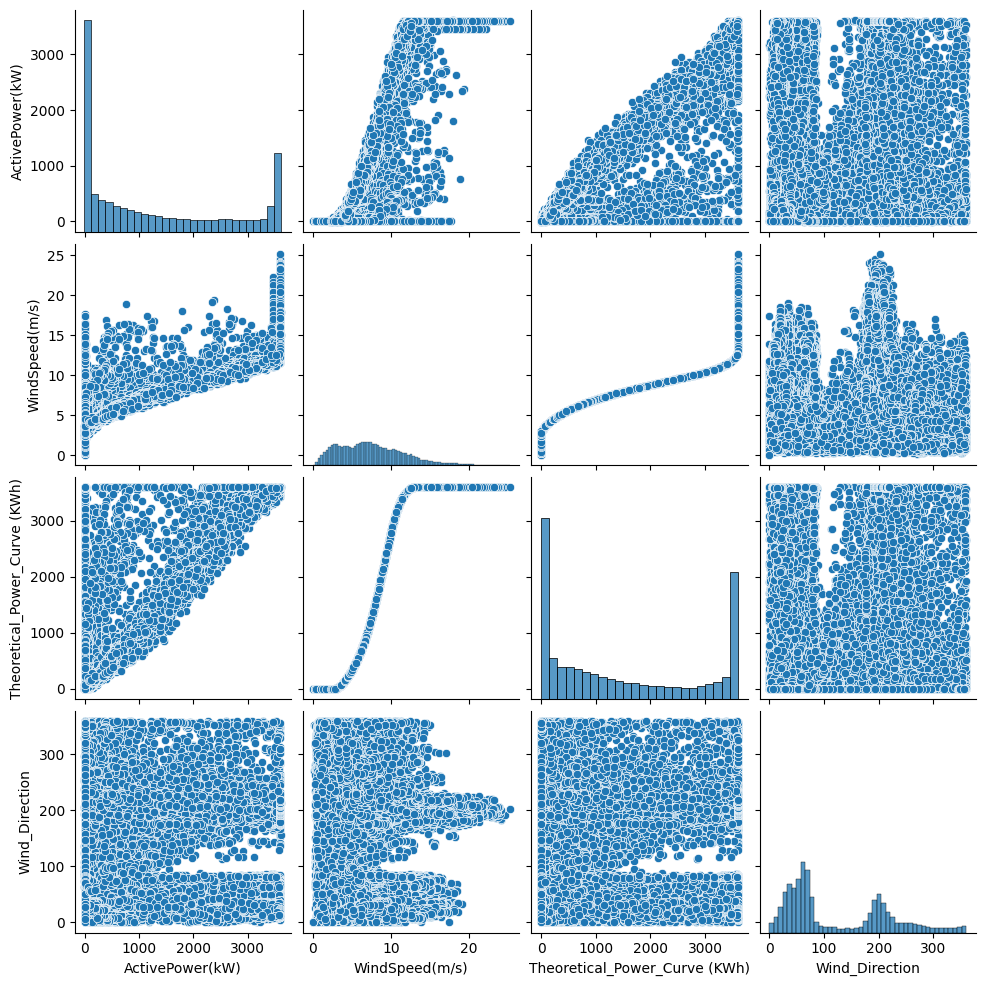

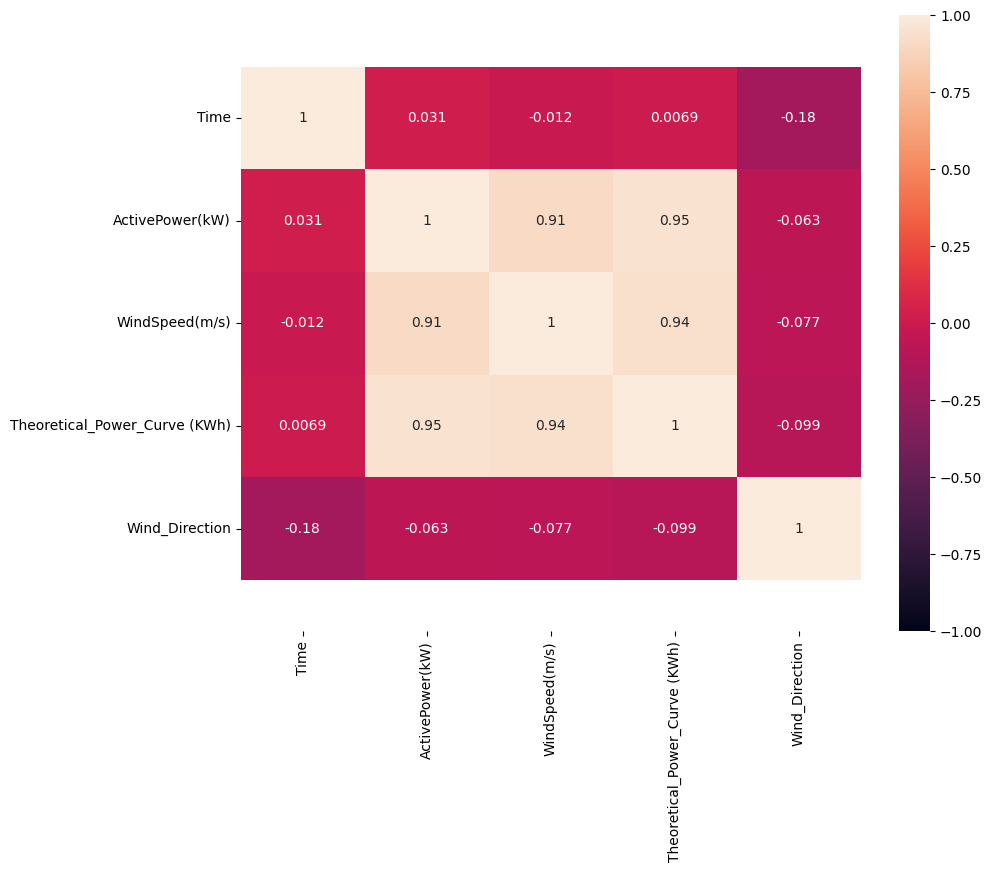

                                   Time  ActivePower(kW)  WindSpeed(m/s)  \
Time                           1.000000         0.030971       -0.012209   
ActivePower(kW)                0.030971         1.000000        0.912774   
WindSpeed(m/s)                -0.012209         0.912774        1.000000   
Theoretical_Power_Curve (KWh)  0.006900         0.949918        0.944209   
Wind_Direction                -0.180336        -0.062702       -0.077188   

                               Theoretical_Power_Curve (KWh)  Wind_Direction  
Time                                                0.006900       -0.180336  
ActivePower(kW)                                     0.949918       -0.062702  
WindSpeed(m/s)                                      0.944209       -0.077188  
Theoretical_Power_Curve (KWh)                       1.000000       -0.099076  
Wind_Direction                                     -0.099076        1.000000  


In [7]:
#Data Description and Visualizing
#Plotting the pair plot, each variable in the data set is plotted with all other variables
sns.pairplot(df)
#Plotting Correlation between the variables
plt.figure(figsize=(10,8))
corr = df.corr()

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
#Print the numerical form for the correlation
print(corr)

In [8]:
y = df['ActivePower(kW)']
X = df [['Theoretical_Power_Curve (KWh)', 'WindSpeed(m/s)']]
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [9]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
#Importing libraries for Model training and fitting
forest_model = RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes =500, random_state=1)
forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()

lr.fit(train_X, train_y)
dt.fit(train_X, train_y)

print("Linear Regression R2:", r2_score(val_y, lr.predict(val_X)))
print("Decision Tree R2:", r2_score(val_y, dt.predict(val_X)))
print("Random Forest R2:", r2_score(val_y, forest_model.predict(val_X)))


Linear Regression R2: 0.9056825575631955
Decision Tree R2: 0.8277564120240467
Random Forest R2: 0.9113496428907649


In [12]:
#Predicting for Test Data
power_preds = forest_model.predict(val_X)
#Evaluating the score of our model
print(mean_absolute_error(val_y, power_preds))
print(r2_score(val_y,power_preds))

164.58015525861344
0.9113496428907649


In [13]:
joblib.dump (forest_model, "power_prediction.sav")

['power_prediction.sav']